In [72]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import csv, sys

In [75]:
headers = []
rows = []
with open('log0.csv','r') as ifile:
    reader = csv.reader(ifile)
    headers = next(reader)
    for row in reader:
        rows.append(row)

processed_rows = []
start_time = float(rows[0][0])

time = []
battery_temp = []
core_temp = []
charge = []
time_rem = []
brightness = []
free_mem = []
total_mem = []
chrome_mem = []
power = []

data_processed_rows = [time, battery_temp, core_temp, charge, time_rem, brightness, free_mem, total_mem, 
                      chrome_mem, power]

def normalize(inp):
    inp = np.array(inp, dtype=np.float64)
    inp -= np.min(inp)
    inp /= np.max(inp)
    inp *= 100
    
    return inp

def data_process(col, data):
    pdata = data
#     if col==1 or col==2 or col==6 or col==7 or col==8 or col==9:        
    if col==4:
        pminutes = int(((pdata*60)%60))
        phours = int(pdata)
        pdata = (phours*60)+pminutes
    if col==5:
        pdata *= 100
    data_processed_rows[col].append(pdata)

def process(row):
    newrow = []
    try:
        colon = row[4].find(':')
#         row[0] = float(row[0])-start_time
        row[4] = row[4][:colon].replace(" ","")+'.'+row[4][colon+1:].replace(" ","")
        for i in xrange(0, len(row)):
            newrow.append(float(row[i]))
    except:
        return
    for i in xrange(0, len(newrow)):
        data_process(i, newrow[i])
    processed_rows.append(newrow)

_ = map(process, rows)
data_processed_rows[1] = normalize(data_processed_rows[1])
data_processed_rows[2] = normalize(data_processed_rows[2])
data_processed_rows[6] = normalize(data_processed_rows[6])
data_processed_rows[7] = normalize(data_processed_rows[7])
data_processed_rows[8] = normalize(data_processed_rows[8])
data_processed_rows[9] = normalize(data_processed_rows[9])
data_processed_rows[4] = normalize(data_processed_rows[4])

In [76]:
data_processed_rows[4]

array([  6.25521268,   6.67222686,   7.08924103, ...,  16.18015013,
        15.67973311,  16.18015013])

In [77]:
# Now identify slices
def slice(charge, time, start = 0 , sd = 60):
    start_pos = start
    end_pos = start_pos+1
    
    while end_pos < len(time) and charge[end_pos-1] == charge[end_pos]: 
        start_pos = end_pos
        end_pos = start_pos + 1
    
    while True:
        if end_pos >= len(time) or end_pos >= len(charge):
            break
#         print "start_pos = %d, end_pos = %d" % (start_pos, end_pos)
#         print "time[end_pos-1] = %d, time[end_pos] = %d, charge[end_pos-1] = %d, charge[end_pos] = %d" \
#             % (time[end_pos-1], time[end_pos], charge[end_pos-1], charge[end_pos])
        if abs((time[end_pos] - time[end_pos-1])-60) >= sd or charge[end_pos-1] < charge[end_pos]:
#             print "Flagged"
            if end_pos > start_pos+1:
#                 print "Ending run at end_pos = %d" % end_pos
                break
            start_pos = end_pos
        end_pos += 1            
    return start_pos, end_pos    

In [78]:
slice(charge,time,0)

(2, 14)

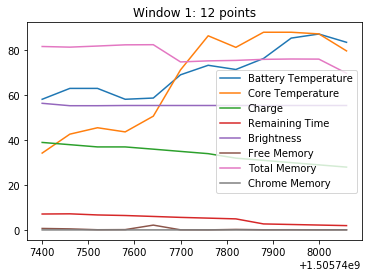

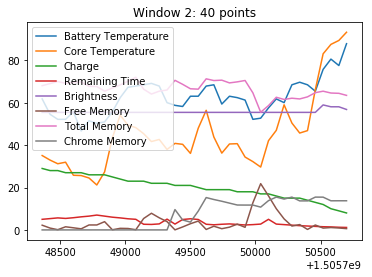

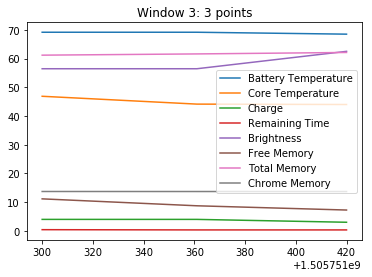

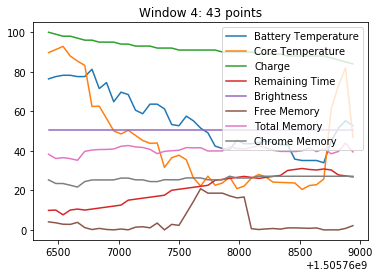

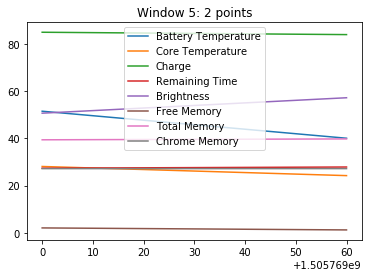

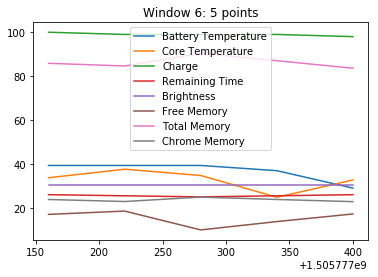

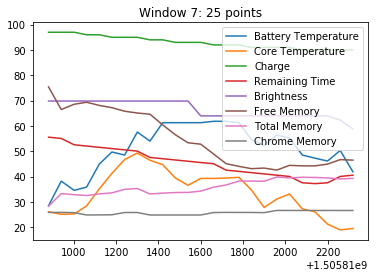

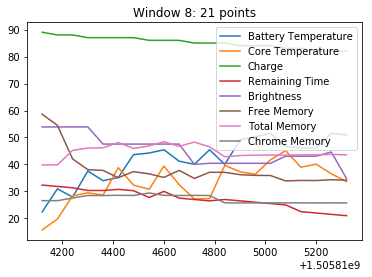

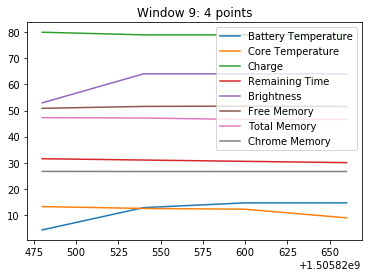

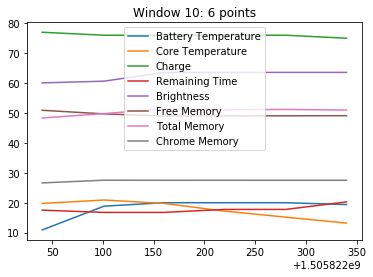

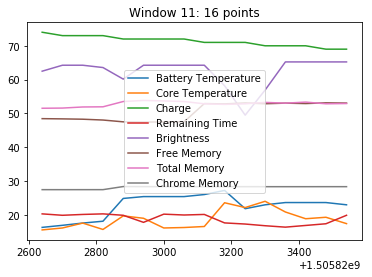

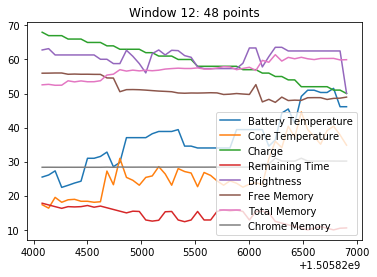

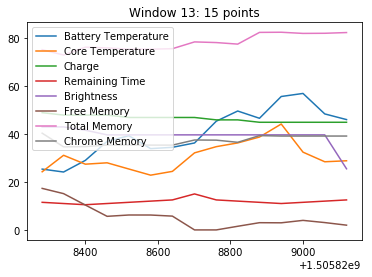

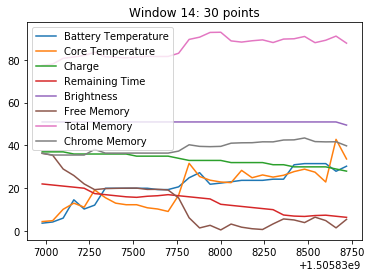

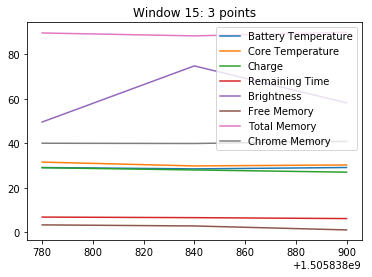

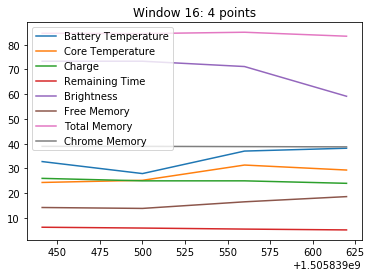

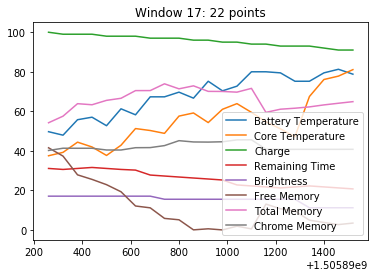

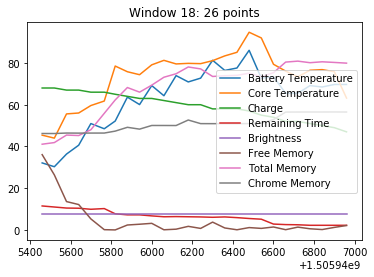

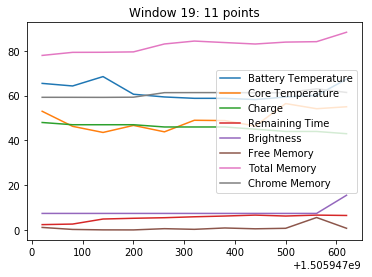

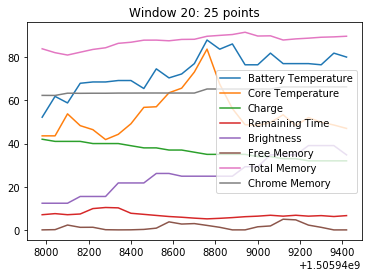

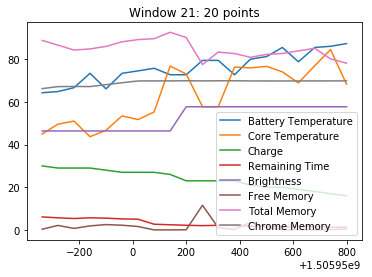

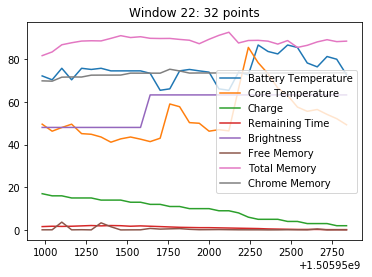

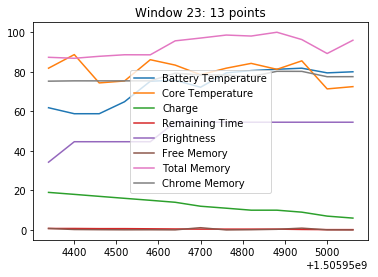

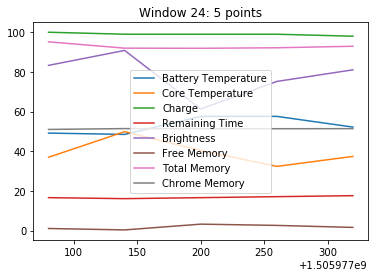

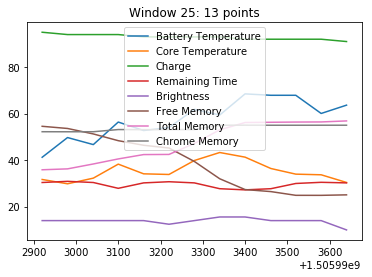

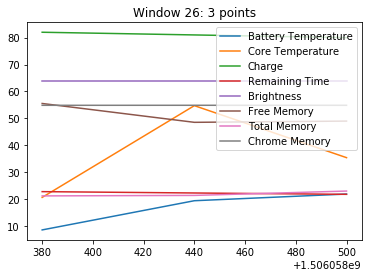

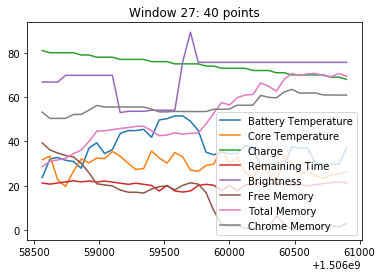

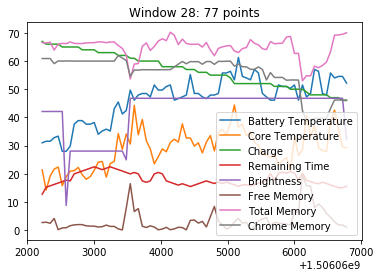

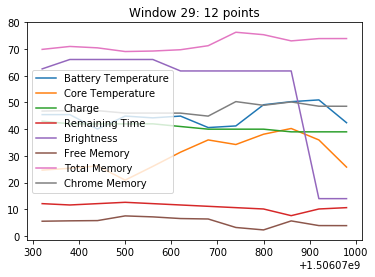

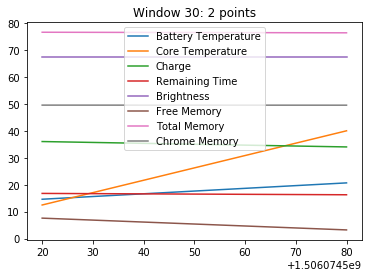

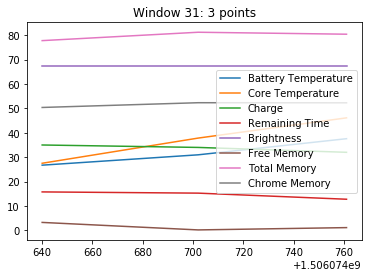

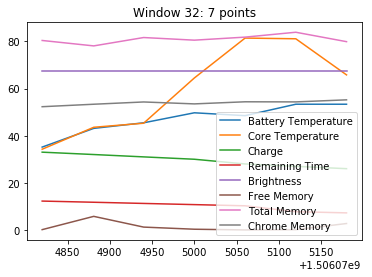

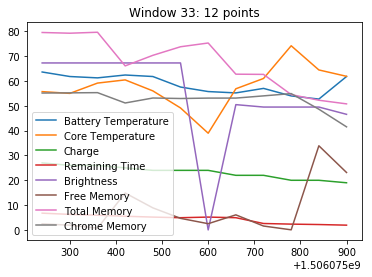

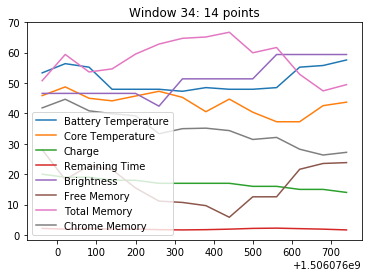

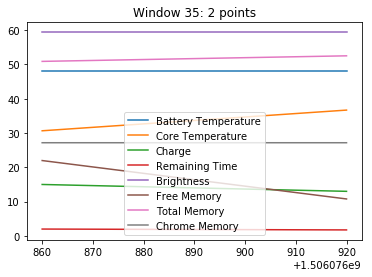

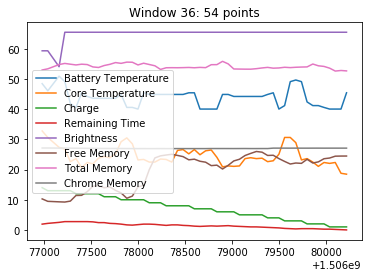

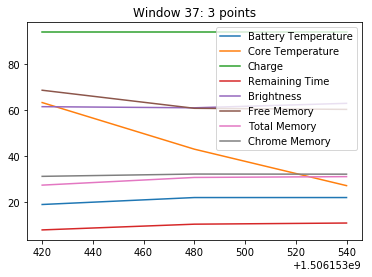

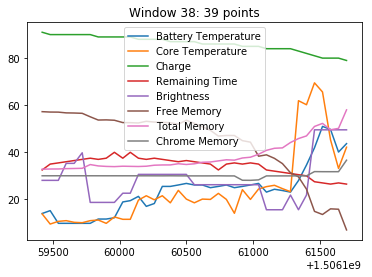

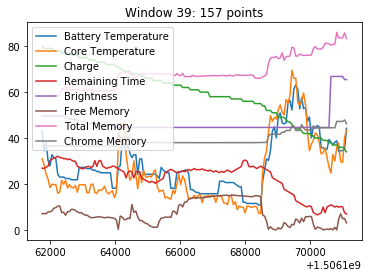

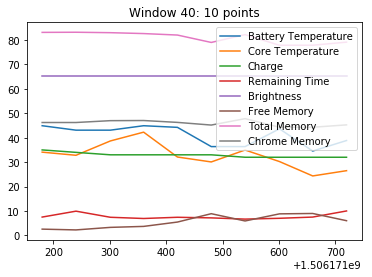

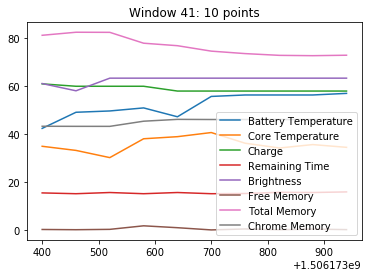

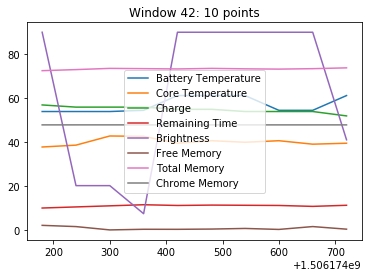

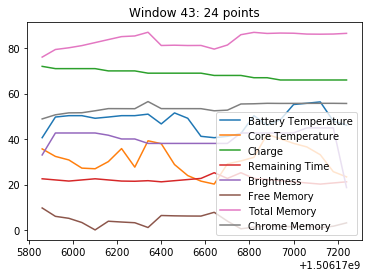

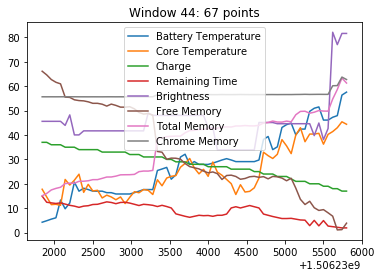

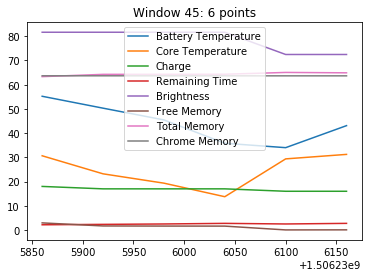

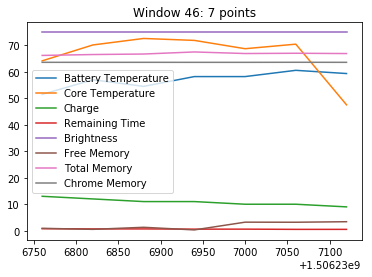

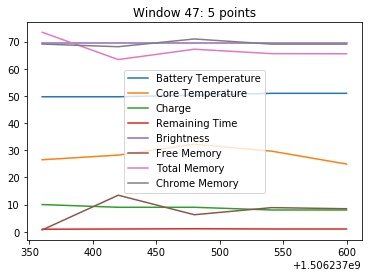

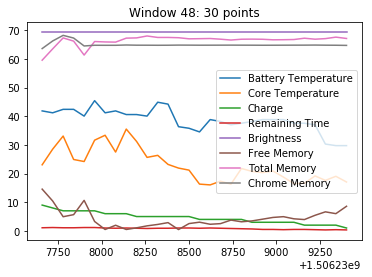

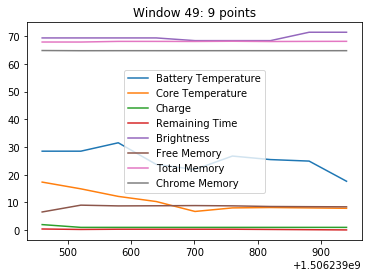

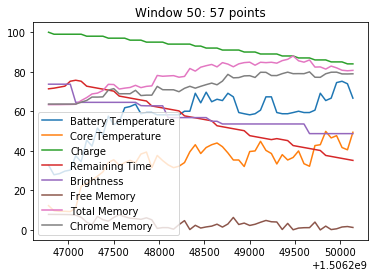

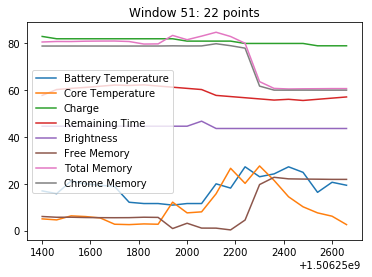

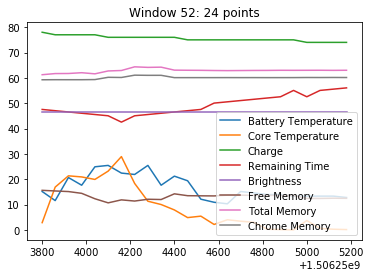

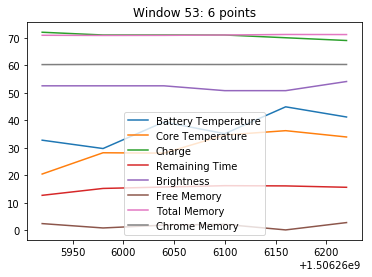

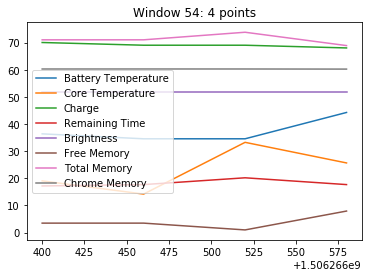

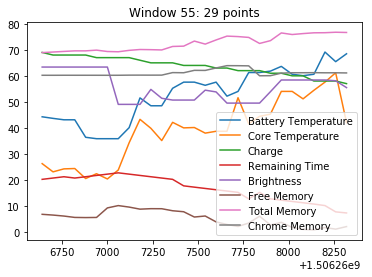

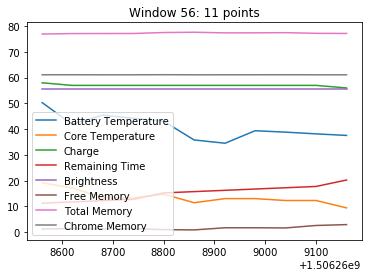

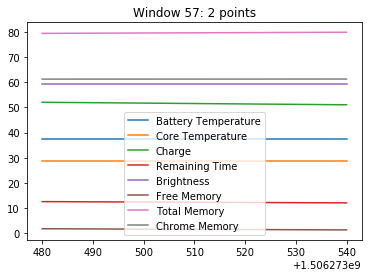

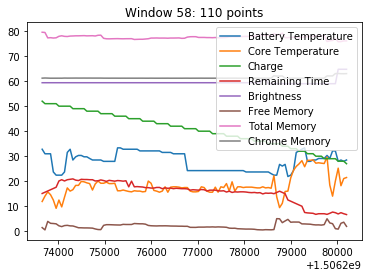

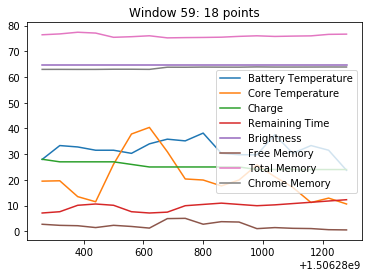

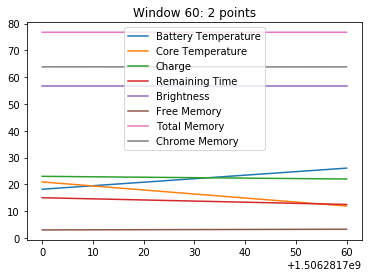

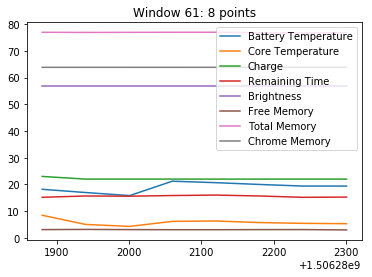

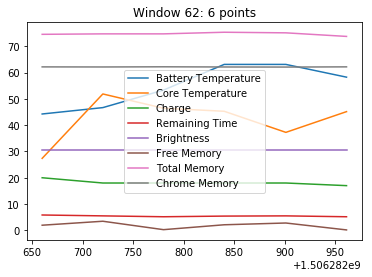

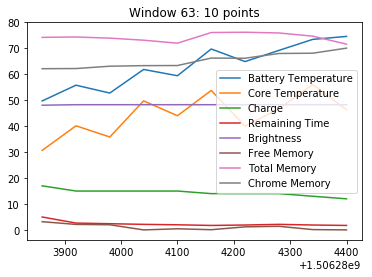

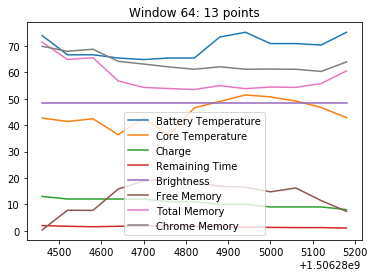

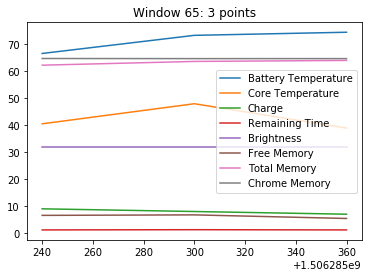

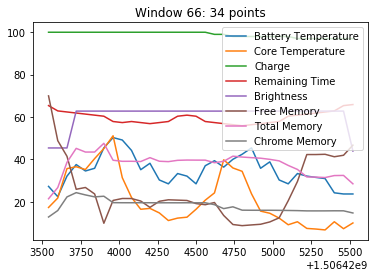

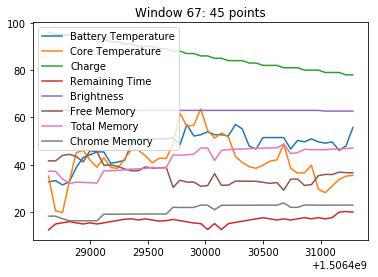

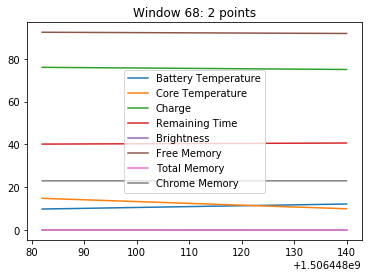

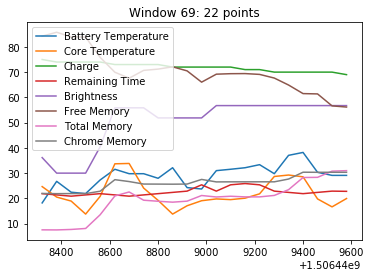

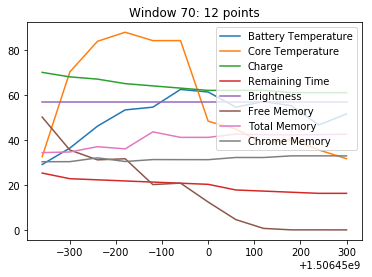

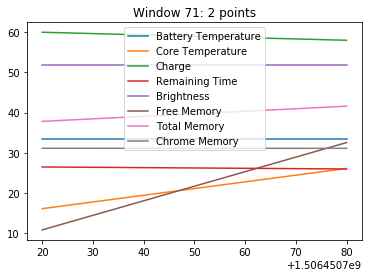

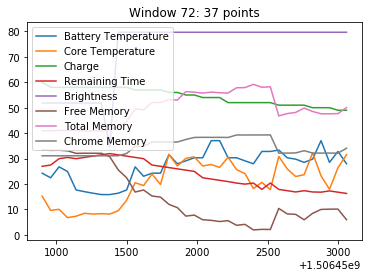

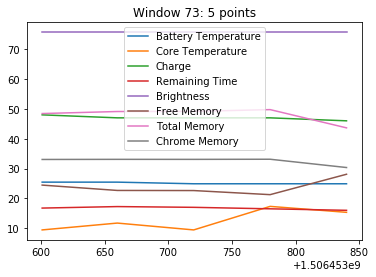

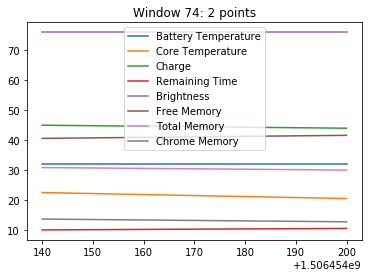

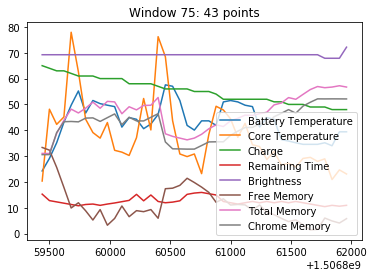

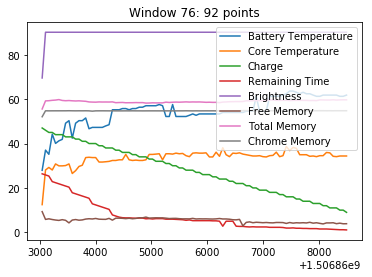

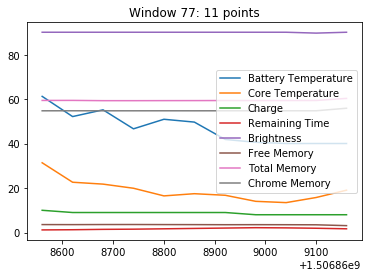

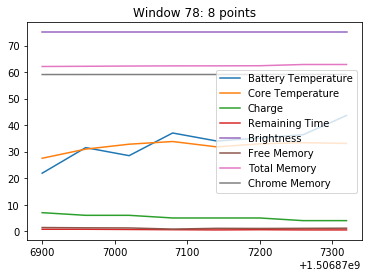

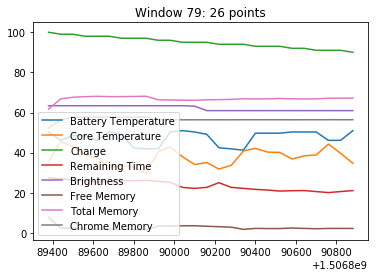

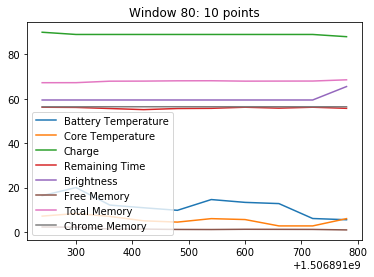

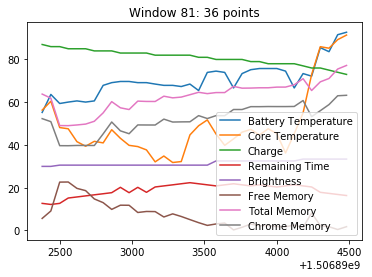

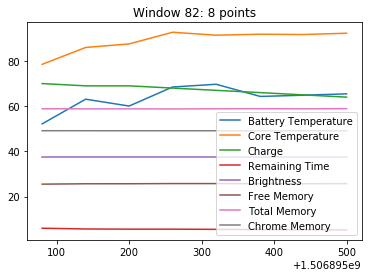

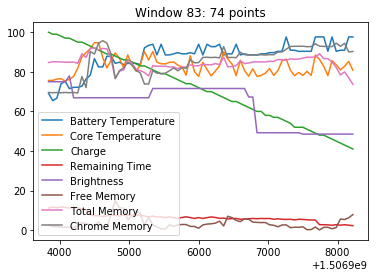

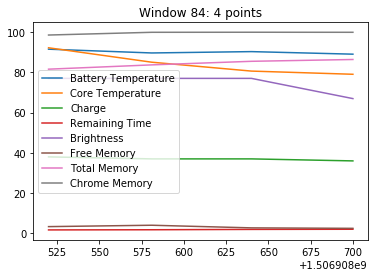

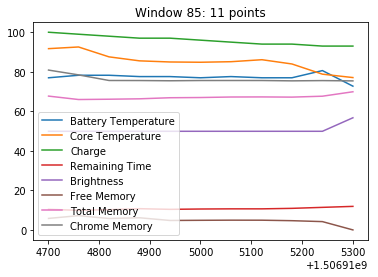

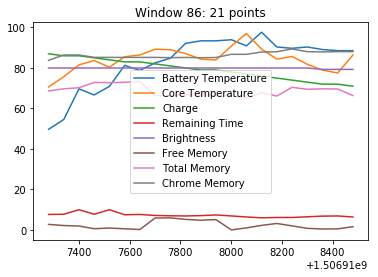

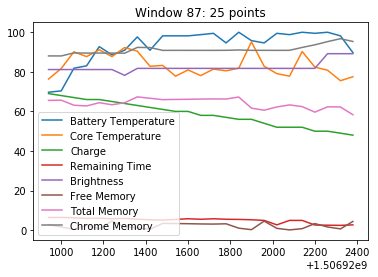

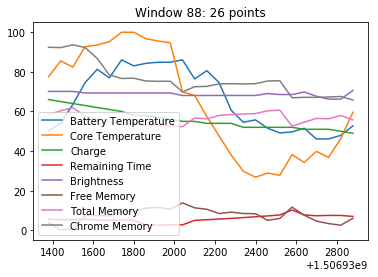

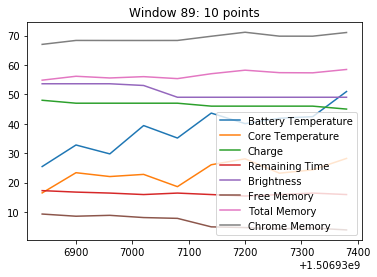

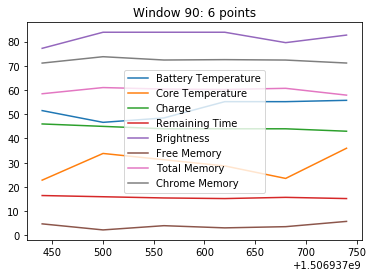

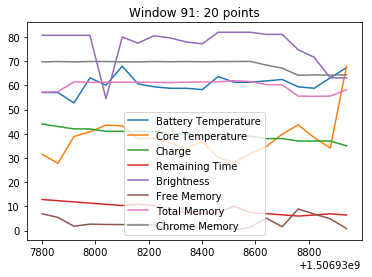

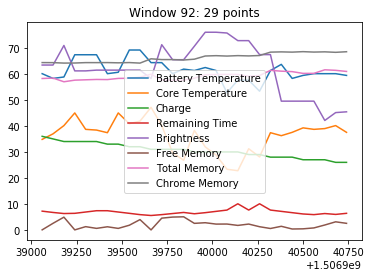

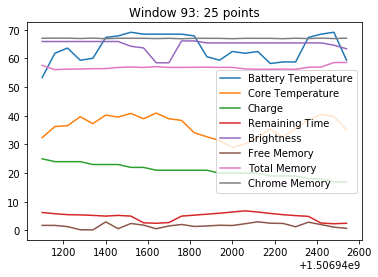

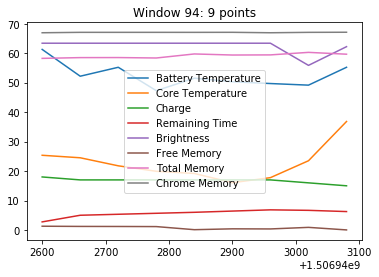

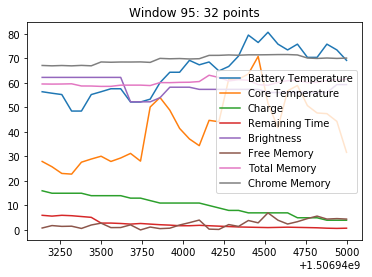

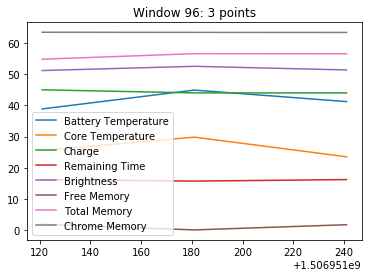

Number of windows: 96


In [79]:
start = 0
i=0
while start < len(time):
    i+=1
    start, end = slice(charge, time, start, 100)
    for j in xrange(1,len(data_processed_rows)-1):
        plt.plot(time[start:end],data_processed_rows[j][start:end],label=headers[j])
    plt.title("Window %d: %d points" % (i, end-start))
    plt.legend()
    plt.show()
    start = end
    
print "Number of windows: %d" % i

In [80]:
slice(charge, time, 100)

(100, 111)

In [90]:
from scipy.stats.stats import linregress
from scipy.stats import pearsonr

Slope - -0.017135


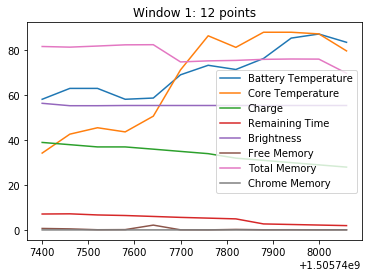

Slope - -0.007749


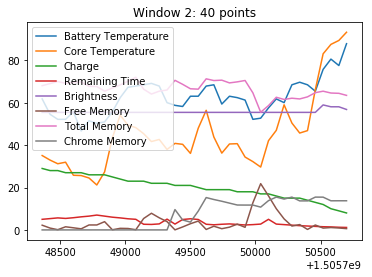

Slope - -0.008286


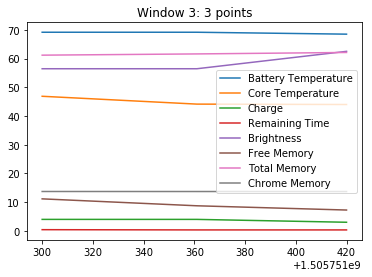

Slope - -0.004889


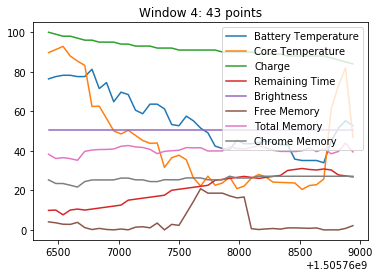

Slope - -0.016667


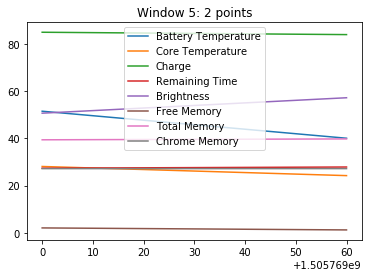

Slope - -0.006667


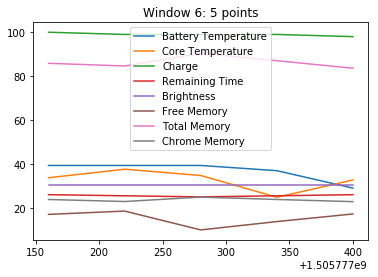

Slope - -0.005461


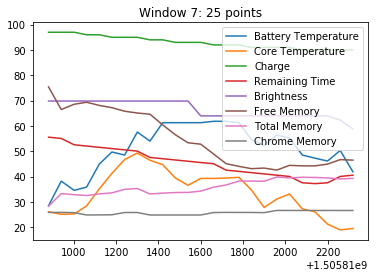

Slope - -0.005628


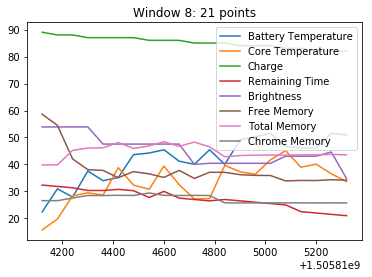

Slope - -0.005000


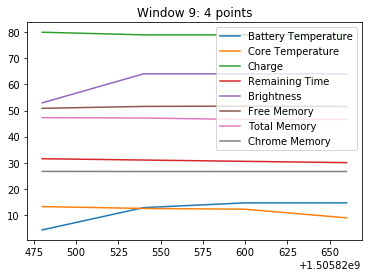

Slope - -0.004775


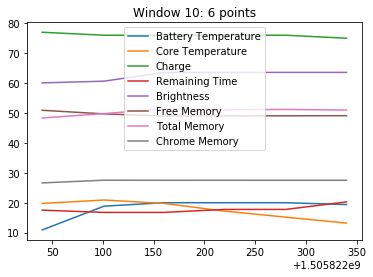

Slope - -0.005144


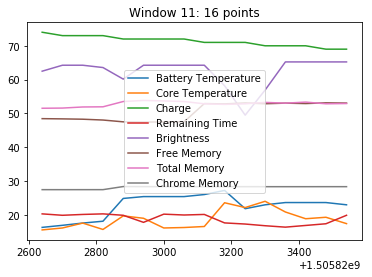

Slope - -0.006088


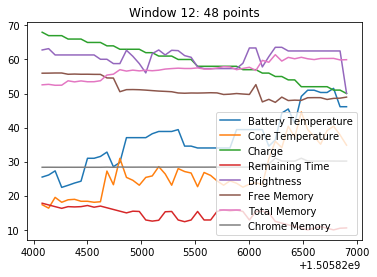

Slope - -0.004882


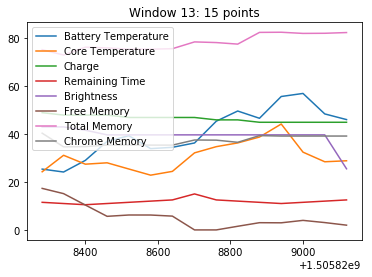

Slope - -0.004954


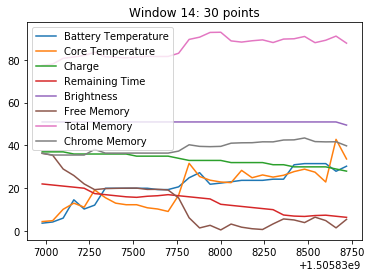

Slope - -0.016667


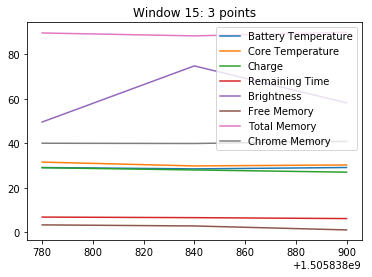

Slope - -0.010044


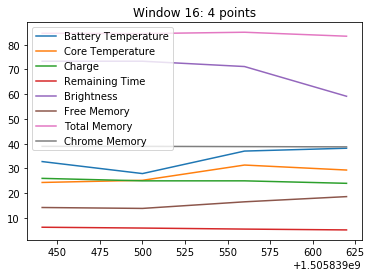

Slope - -0.006993


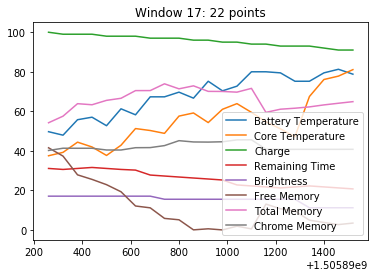

Slope - -0.013858


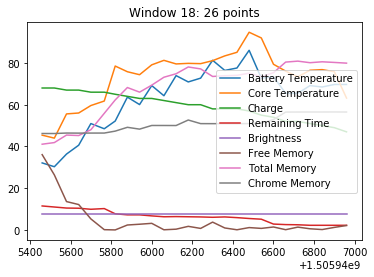

Slope - -0.007573


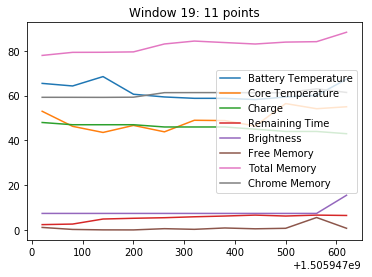

Slope - -0.007476


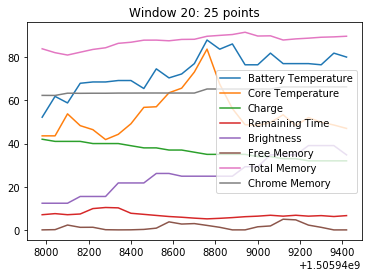

Slope - -0.012367


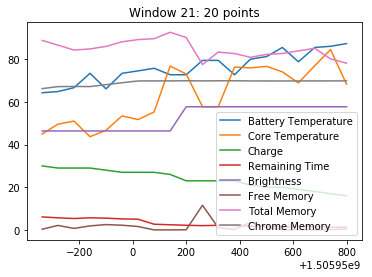

Slope - -0.008425


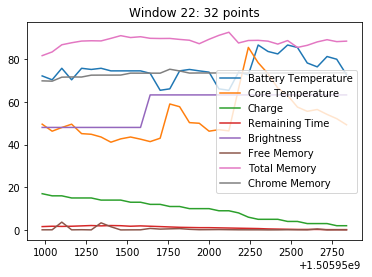

Slope - -0.017943


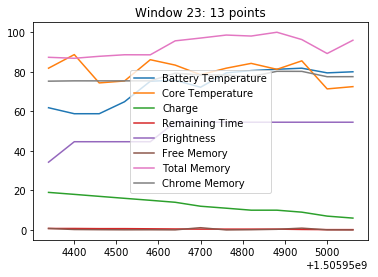

Slope - -0.006667


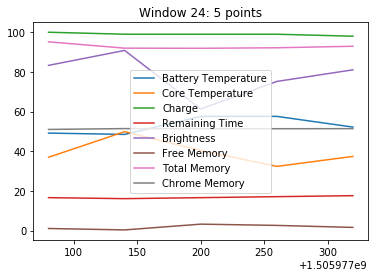

Slope - -0.004579


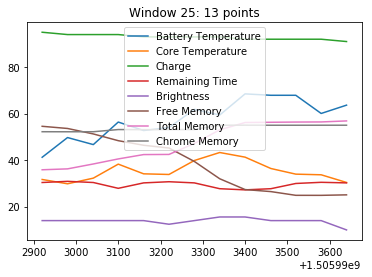

Slope - -0.016667


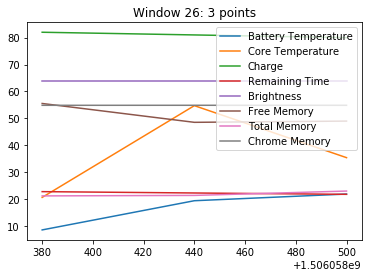

Slope - -0.005233


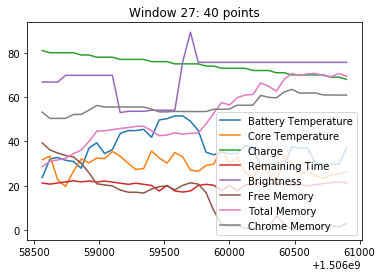

Slope - -0.004590


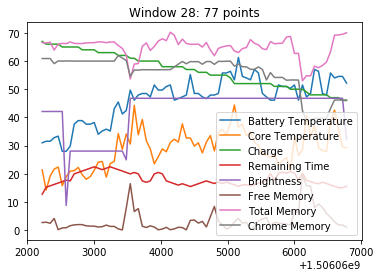

Slope - -0.006352


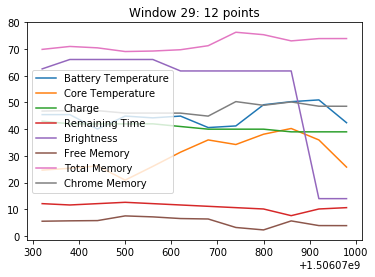

Slope - -0.033333


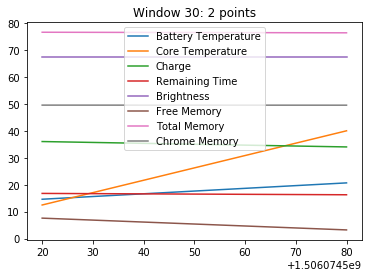

Slope - -0.024720


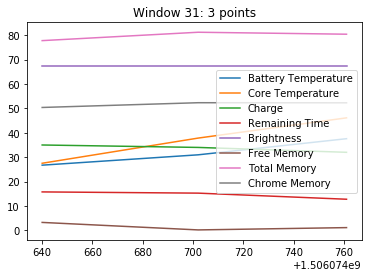

Slope - -0.020262


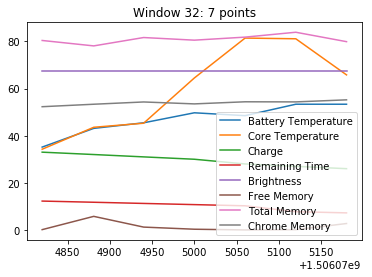

Slope - -0.011946


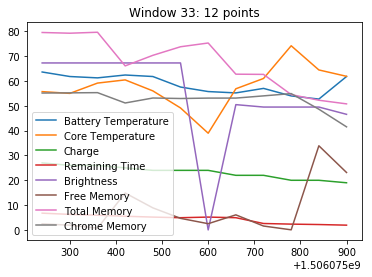

Slope - -0.006669


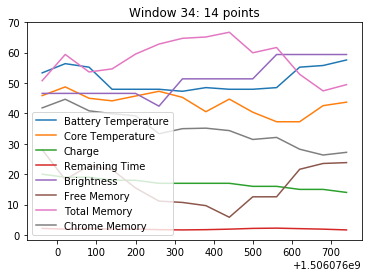

Slope - -0.033333


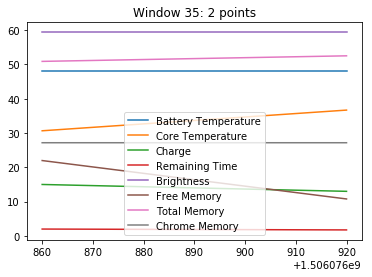

Slope - -0.004047


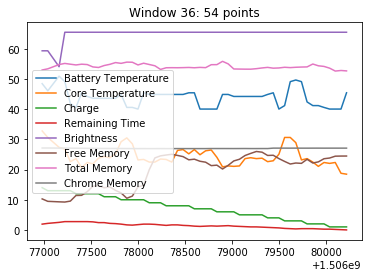

Slope - 0.000000


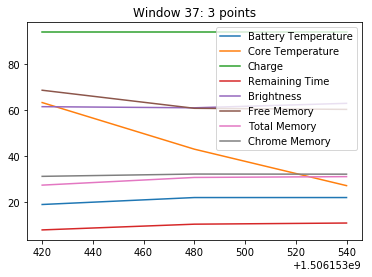

Slope - -0.004660


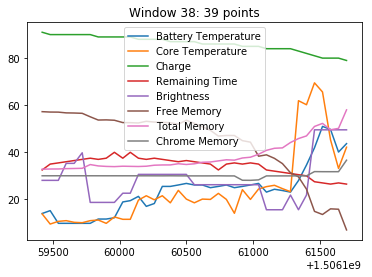

Slope - -0.004568


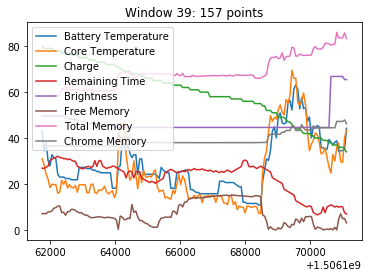

Slope - -0.004952


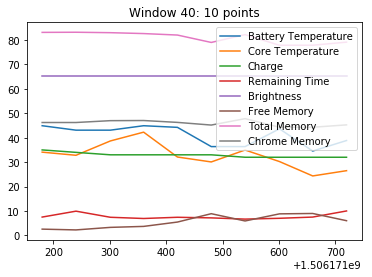

Slope - -0.005755


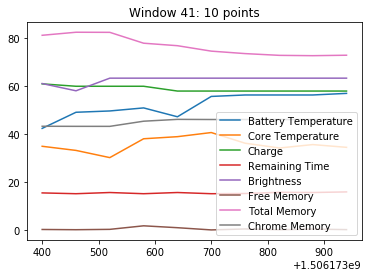

Slope - -0.007574


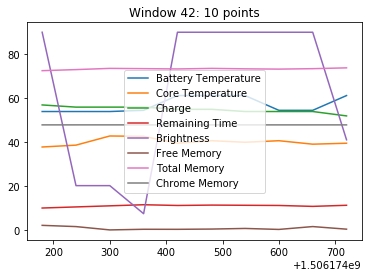

Slope - -0.004529


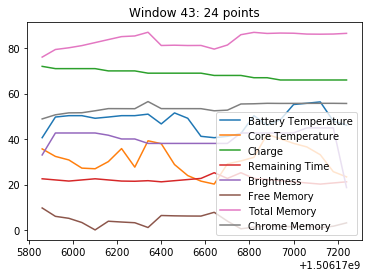

Slope - -0.004765


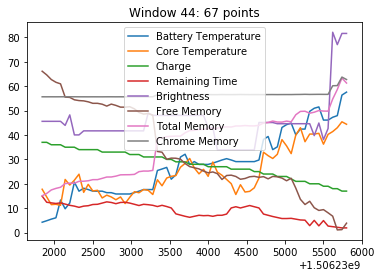

Slope - -0.006190


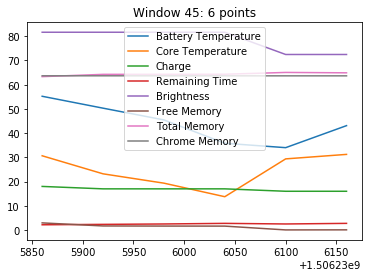

Slope - -0.010119


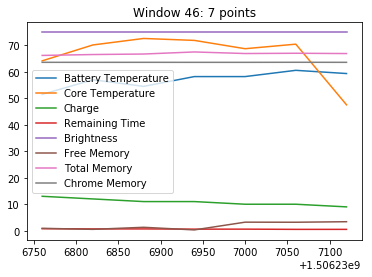

Slope - -0.008328


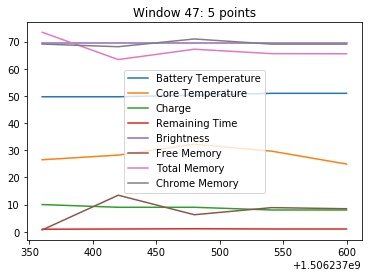

Slope - -0.003696


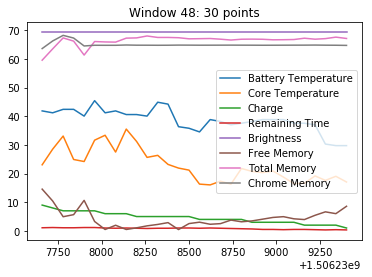

Slope - -0.001113


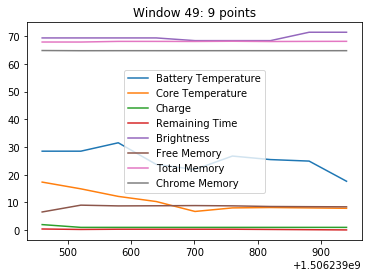

Slope - -0.004734


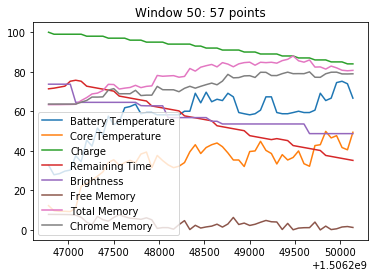

Slope - -0.002917


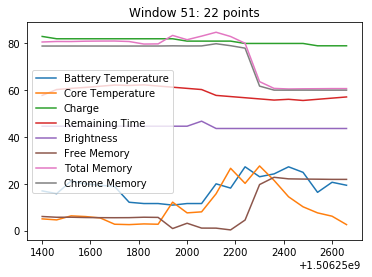

Slope - -0.002471


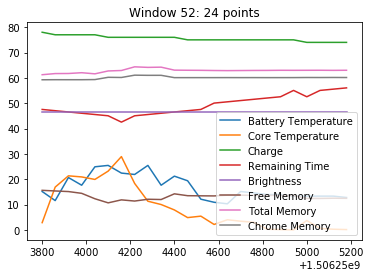

Slope - -0.008571


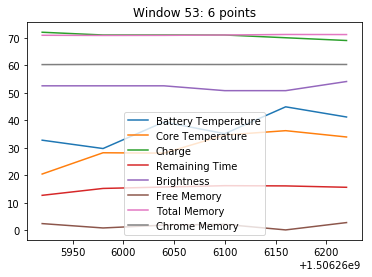

Slope - -0.010000


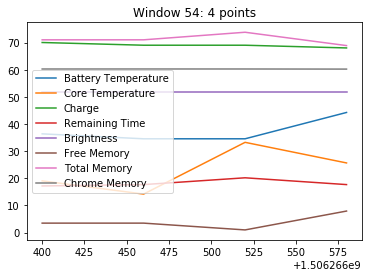

Slope - -0.006838


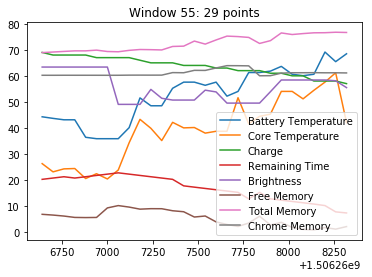

Slope - -0.001514


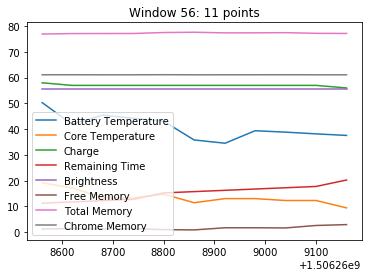

Slope - -0.016667


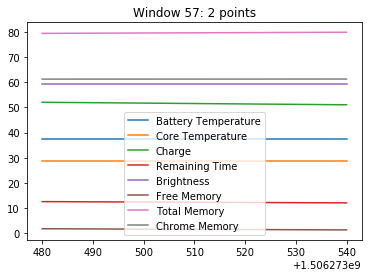

Slope - -0.003571


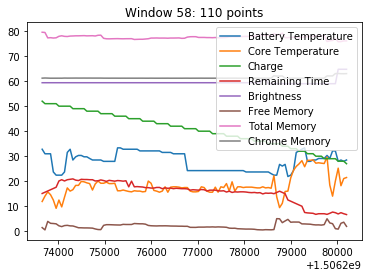

Slope - -0.003887


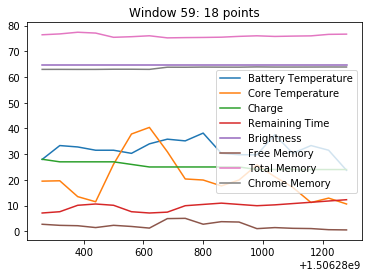

Slope - -0.016667


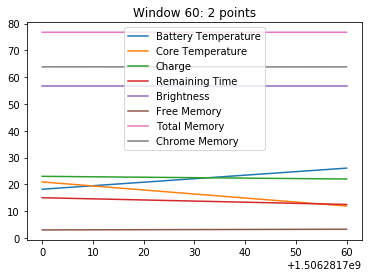

Slope - -0.001388


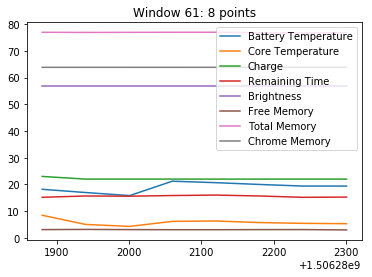

Slope - -0.007110


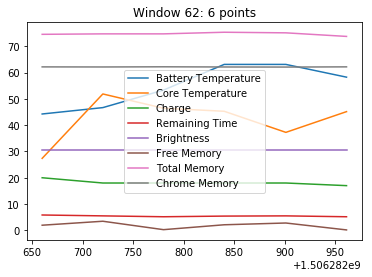

Slope - -0.006869


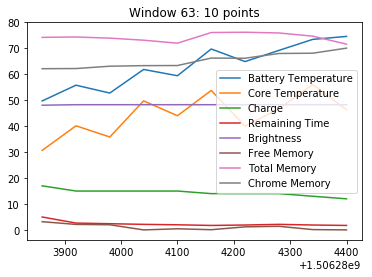

Slope - -0.006500


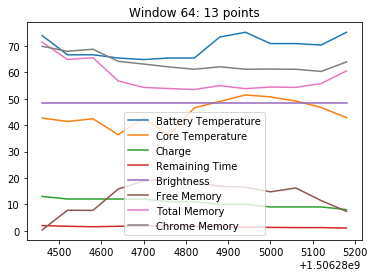

Slope - -0.016667


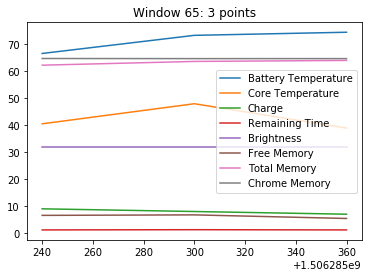

Slope - -0.001927


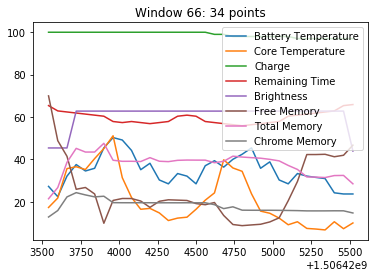

Slope - -0.006987


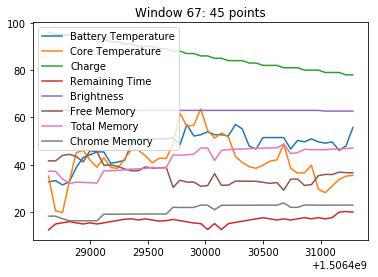

Slope - -0.017241


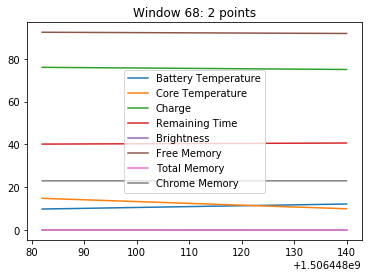

Slope - -0.004254


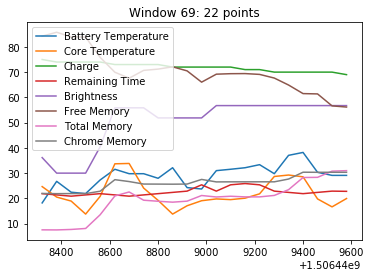

Slope - -0.013170


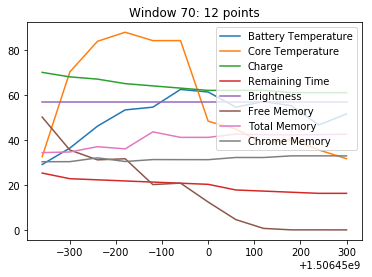

Slope - -0.033333


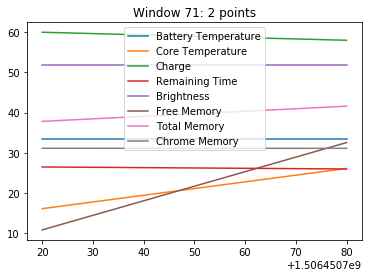

Slope - -0.004963


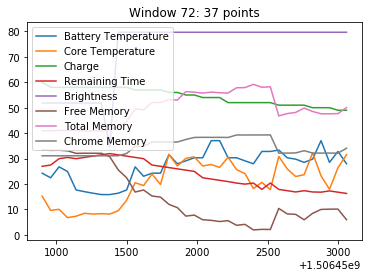

Slope - -0.006683


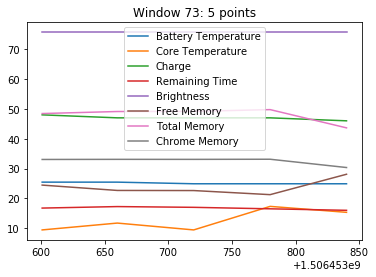

Slope - -0.016667


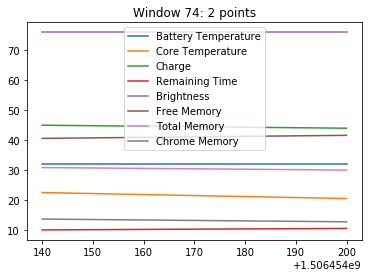

Slope - -0.006526


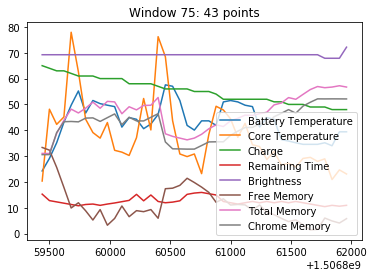

Slope - -0.006781


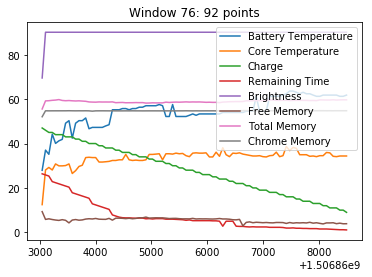

Slope - -0.002877


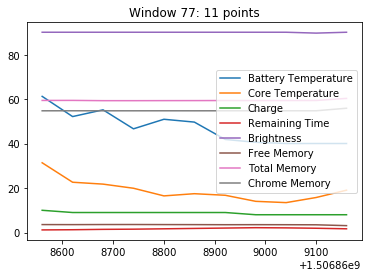

Slope - -0.006745


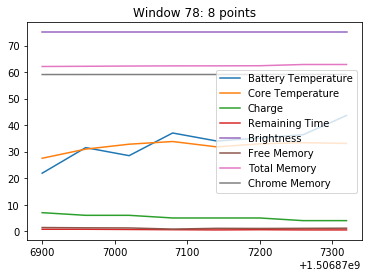

Slope - -0.006187


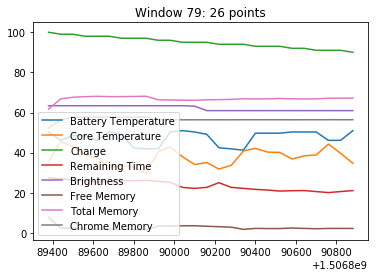

Slope - -0.001818


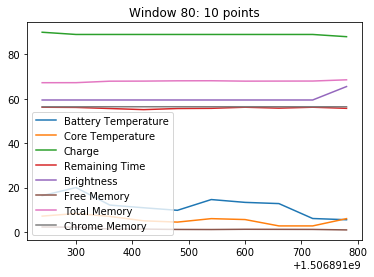

Slope - -0.005545


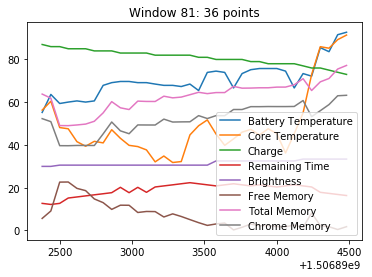

Slope - -0.014277


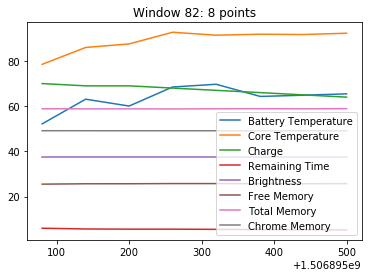

Slope - -0.013482


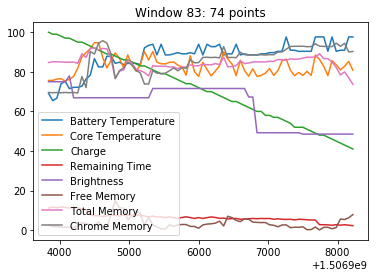

Slope - -0.010033


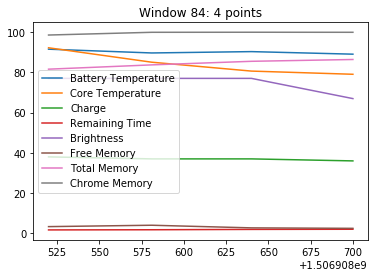

Slope - -0.011975


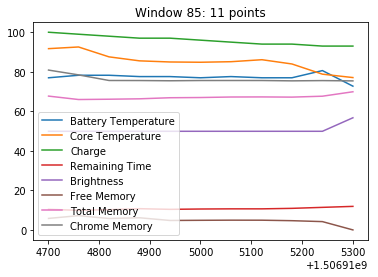

Slope - -0.013679


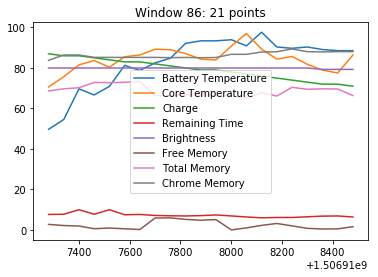

Slope - -0.014639


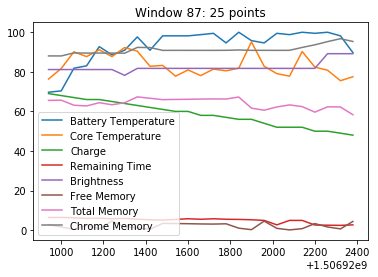

Slope - -0.010632


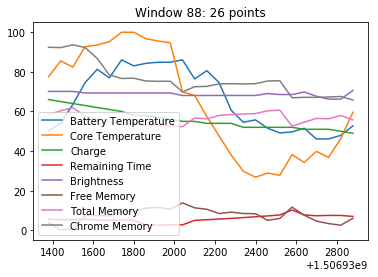

Slope - -0.004341


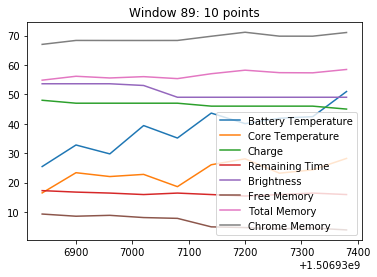

Slope - -0.008571


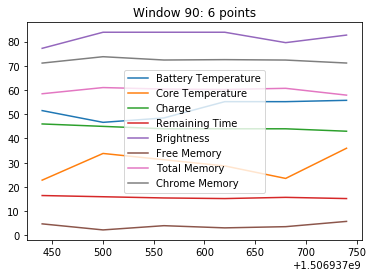

Slope - -0.006279


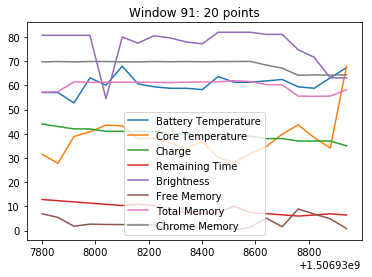

Slope - -0.005419


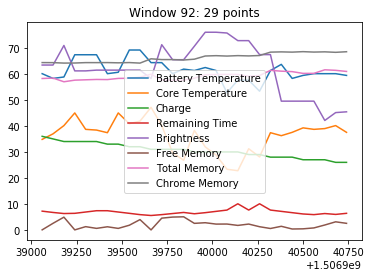

Slope - -0.005050


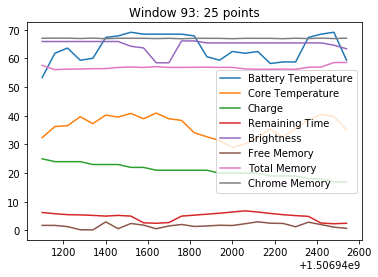

Slope - -0.004167


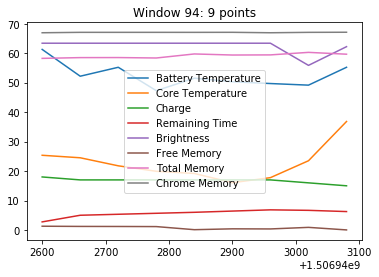

Slope - -0.006805


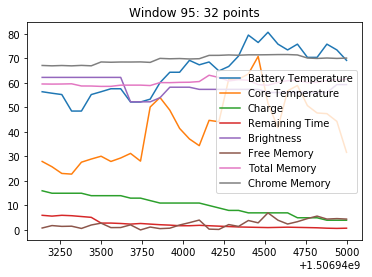

Slope - -0.008333


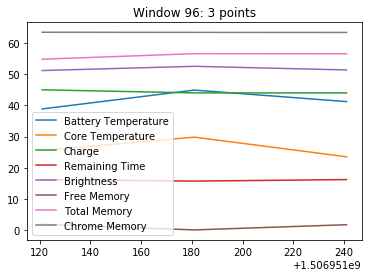

Number of windows: 96


In [82]:
start = 0
i=0
slopes = []
intervals = []
averaged_windows = []
while start < len(time):
    i+=1
    start, end = slice(charge, time, start, 100)
    averages = []
    for j in xrange(1,len(data_processed_rows)-1):
        plt.plot(time[start:end],data_processed_rows[j][start:end],label=headers[j])
        averages.append(np.average(data_processed_rows[j][start:end]))
        
    slope, intercept, r_value, p_value, std_err = linregress(time[start:end],charge[start:end])
    slopes.append(slope)
    intervals.append(end-start)
    averaged_windows.append(averages)
    print "Slope - %f" % slope
    plt.title("Window %d: %d points" % (i, end-start))
    
    plt.legend()
    plt.show()
    start = end
    
print "Number of windows: %d" % i

In [92]:
slopes

[-0.017134618993819236,
 -0.0077486914473650576,
 -0.008286269789834275,
 -0.004889318957388547,
 -0.016666666666666666,
 -0.0066666666666666671,
 -0.0054614681404088362,
 -0.0056283242254521193,
 -0.0050000000000000001,
 -0.0047754858393579637,
 -0.0051442548135439735,
 -0.006088265055706088,
 -0.0048820469810650921,
 -0.0049539356707369525,
 -0.016666666666666666,
 -0.010044470631146276,
 -0.0069925554434362592,
 -0.013858005647929009,
 -0.0075725152741596396,
 -0.0074759407986552361,
 -0.012366976365679735,
 -0.0084251234122025079,
 -0.01794347079199091,
 -0.0066666666666666671,
 -0.0045793466510694741,
 -0.016666666666666666,
 -0.0052326634809495417,
 -0.0045902200749044454,
 -0.0063519813519813517,
 -0.033333333333333333,
 -0.024720021851953017,
 -0.020262073001991687,
 -0.011946386946386946,
 -0.0066690921403215961,
 -0.033333333333333333,
 -0.0040470447607443118,
 0.0,
 -0.0046601567159193545,
 -0.0045683087821332159,
 -0.0049521618738754278,
 -0.0057547757171269908,
 -0.0075738

In [ ]:
cor2 = []
for i in xrange(0, len())

In [98]:
len(slopes)

96

In [85]:
# Now let's try some hacky regression
correlations = np.array(correlations)
pvalues = np.array(pvalues)



NameError: name 'correlations' is not defined

In [86]:
for i in xrange(0, len(correlations[0])):
    print np.nansum(correlations[:,i]*pvalues[:,i])/np.nansum(pvalues[:,i])

NameError: name 'correlations' is not defined

In [93]:
averaged_windows = np.array(averaged_windows)

In [94]:
len(averaged_windows[0,:])

8

In [95]:
for i in xrange(0,len(averaged_windows[0,:])):
    if(i!=0 and i!=3 and i!=4):
        print "\n%s: Correlation - \t\t%s" % (headers[i], pearsonr(slopes,averaged_windows[:,i]))


Battery Temperature: Correlation - 		(-0.30111291813754187, 0.0028715886121953808)

Core Temperature: Correlation - 		(0.13748639219000547, 0.18161696913365613)

Brightness: Correlation - 		(0.050132201125346637, 0.62763091554318495)

Free Memory: Correlation - 		(-0.017650794670165428, 0.86446784916044606)

Total Memory: Correlation - 		(0.050217011498682969, 0.62704822062665655)


In [67]:
dpr = np.array(data_processed_rows[:-1])

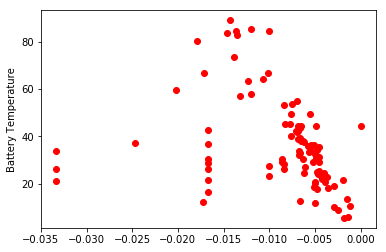

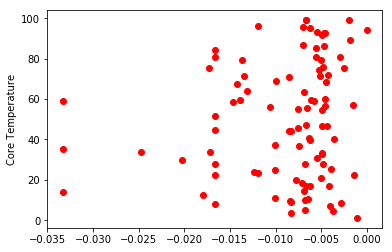

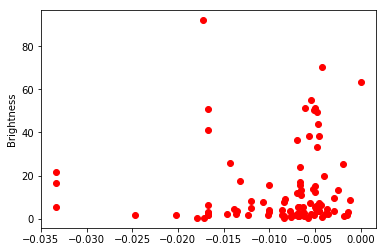

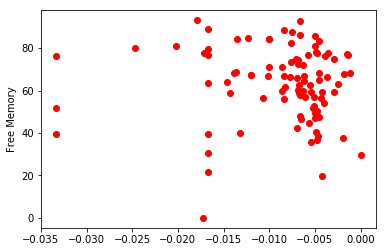

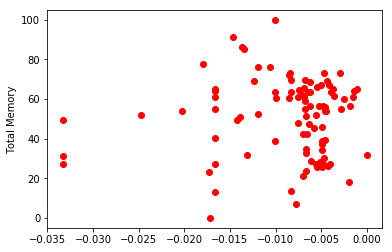

In [105]:
for i in xrange(0,len(averaged_windows[0,:])):
    if(i!=0 and i!=3 and i!=4):
        plt.plot(slopes,averaged_windows[:,i],'ro')
        plt.ylabel(headers[i])
        plt.figure()

In [68]:
with open('uncalibrated_with_dates.csv','w') as of:
    of.write(','.join(headers)+'\n')
    for i in xrange(0,len(dpr[0])):
        of.write(','.join(str(v) for v in dpr[:,i])+'\n')

In [41]:
len(dpr[0])

2241